Кластеризация — разбиение множества объектов на подмножества, называемые кластерами. Цель – разделить данные таким образом, чтобы точки, находящие в одном и том же кластере, были очень схожи друг с другом, а точки, находящиеся в разных кластерах,
отличались друг от друга.

Метод k-средних
Кластеризация k-средних – один из самых простых и наиболее часто используемых алгоритмов кластеризации. Сначала выбирается число
кластеров k. После выбора значения k алгоритм k-средних отбирает точки, которые будут представлять центры кластеров (cluster centers). Затем для каждой точки данных вычисляется его евклидово расстояние до каждого центра кластера.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


Пример 1

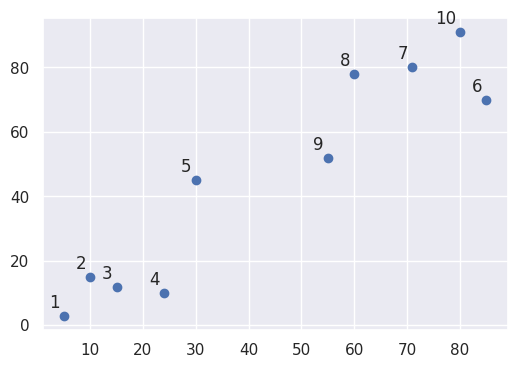

In [2]:
# сформируем произвольный массив данных
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,45], [85,70], [71,80], [60,78], [55,52], [80,91]])
k_values = range(2, 6)

#посмотрим на его распределение
labels = range(1, 11)
plt.figure(figsize = (6,4))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(X[:,0],X[:,1], label = 'True Position')
for label, x, y in zip(labels, X[:,0], X[:, 1]):
    plt.annotate(label,xy = (x, y), xytext = (-3, 3),textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

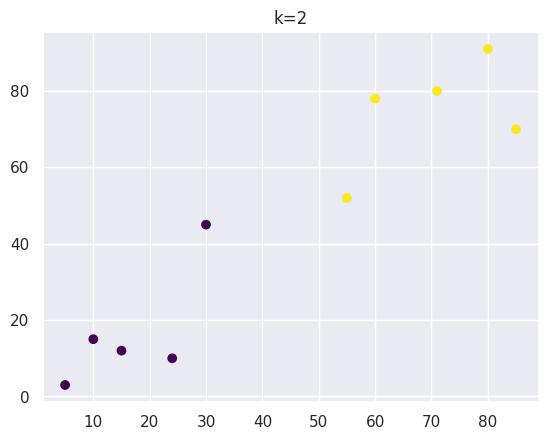

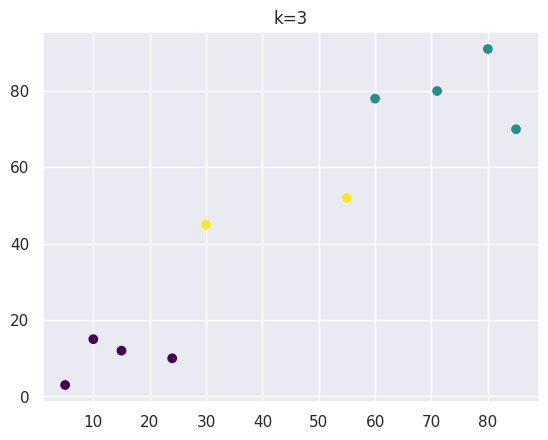

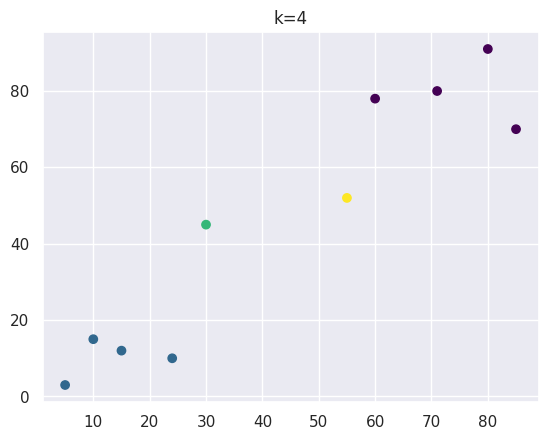

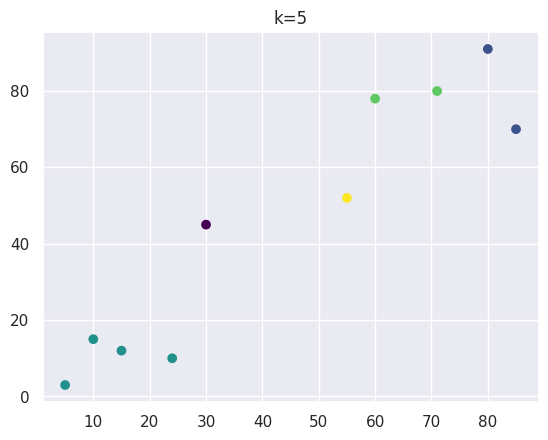

In [3]:
# проведем кластерный анализ данных методом k-средних, экспериментируя с количеством кластеров
for k in k_values:     #меняем число кластеров
    kmeans = KMeans(n_clusters=k ,n_init=k )
    y_kmeans = kmeans.fit_predict(X)     #нормализация данных и определение принадлежности каждой точки к какому то кластеру

    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
    plt.title(f'k={k}')
    plt.show()

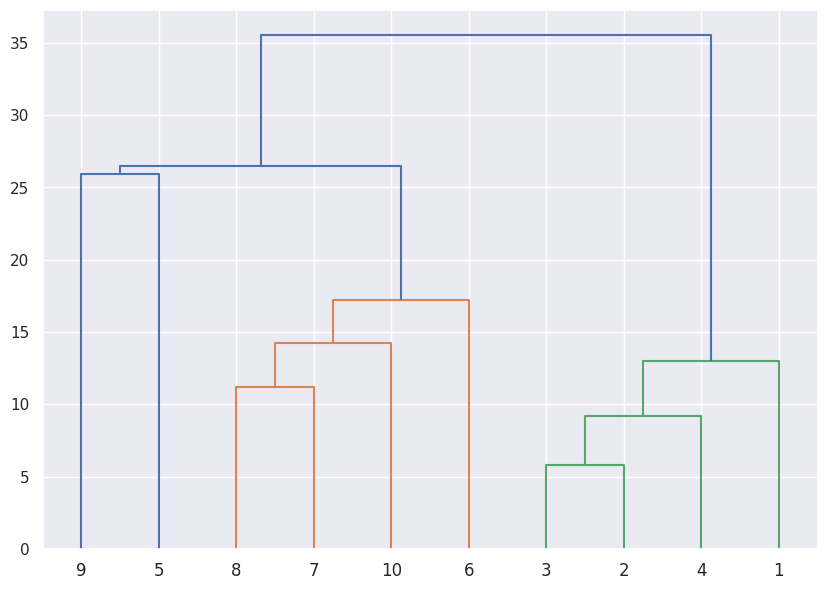

In [7]:
# далее построим дендрограмму для точек данных с помощью библиотеки Scipy
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize = (10, 7))
dendrogram(linked, orientation = 'top', labels = labelList,
    distance_sort ='descending',show_leaf_counts = True)
plt.show()

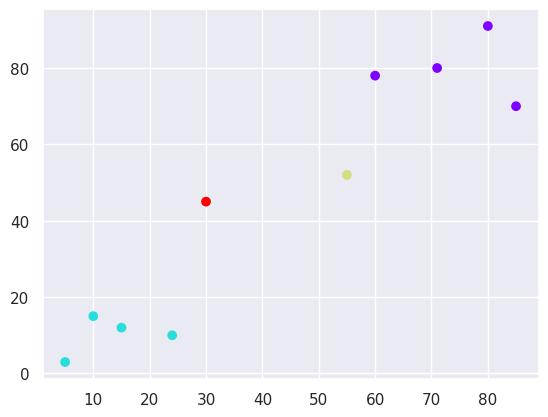

In [15]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow')
plt.show()


Ещё пример 2

Набор данных состоит из пяти столбцов. Чтобы просмотреть результаты в двумерном пространстве, мы сохраним только два из них:«Годовой доход» (в тысячах долларов) и «Оценка расходов» (1–100). Столбец «Оценка расходов» показывает, как часто человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход. Отфильтруем первые три столбца из нашего набора данных:

In [50]:
# разделим клиентов на разные группы в зависимости от их покупательских тенденций

url = 'https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv'
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
customer_data.shape

(200, 5)

In [52]:
#Фильтр данных
data = customer_data.iloc[:,3:5].values

<Figure size 5040x2160 with 0 Axes>

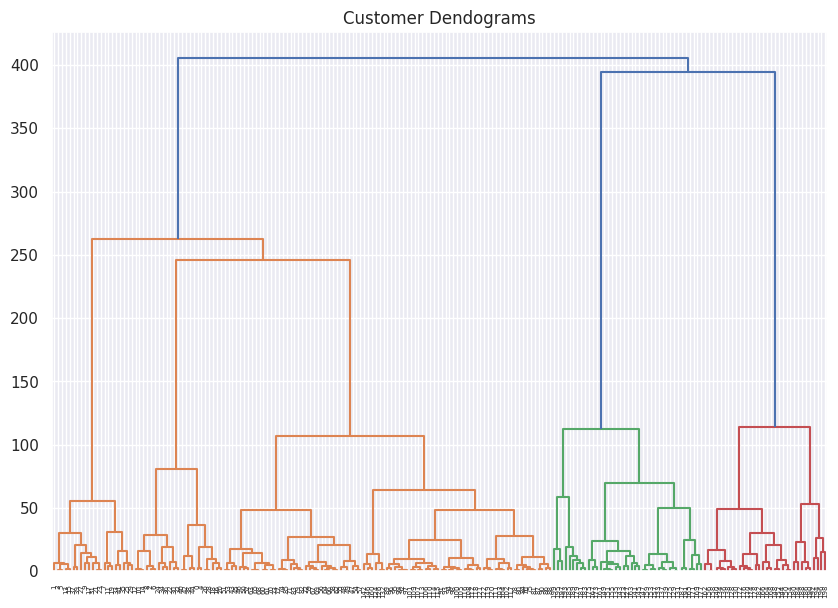

In [53]:
# нужно знать кластеры, на которые мы хотим разделить наши данные
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

Если мы нарисуем горизонтальную линию, которая проходит через самое длинное расстояние без горизонтальной линии, мы получим 5 кластеров. Теперь мы знаем количество кластеров для нашего набора данных, следующим шагом будет группировка точек данных в эти пять кластеров. Для этого мы  воспользуемся классом AgglomerativeClustering библиотеки sklearn.cluster.

In [60]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

В качестве последнего шага  построим кластеры, чтобы увидеть, как на самом деле были сгруппированы данные:

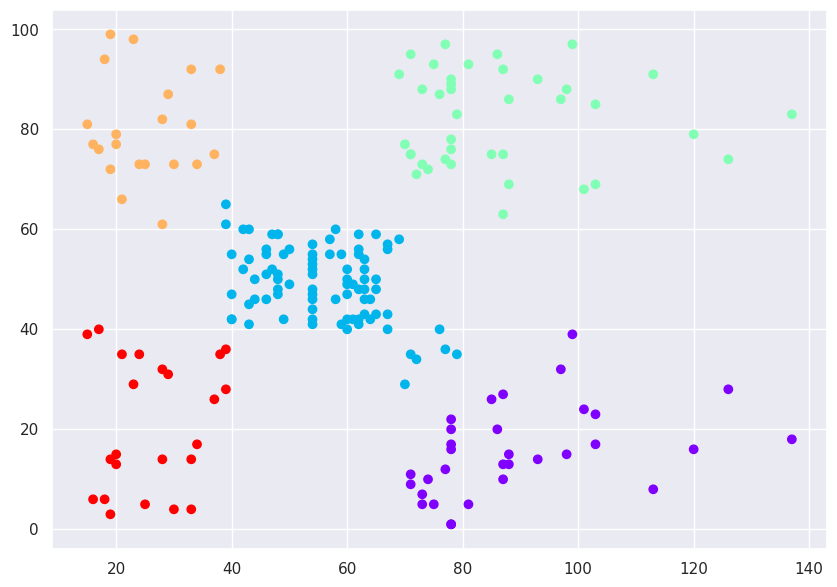

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Пример 3. Выполним иерархическую кластеризацию для набора данных об ирисах Фишера. При этом необходимо использовать любые два признака (всего их четыре)

In [82]:
from sklearn.datasets import load_iris
iris=load_iris()
data_iris = iris.data[:,:2] # первые 2 признака
#data_iris = iris.data[:,2:] # вторые 2 признака
#data_iris = iris.data # все признаки
data_iris

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [77]:
data_iris.shape

(150, 4)

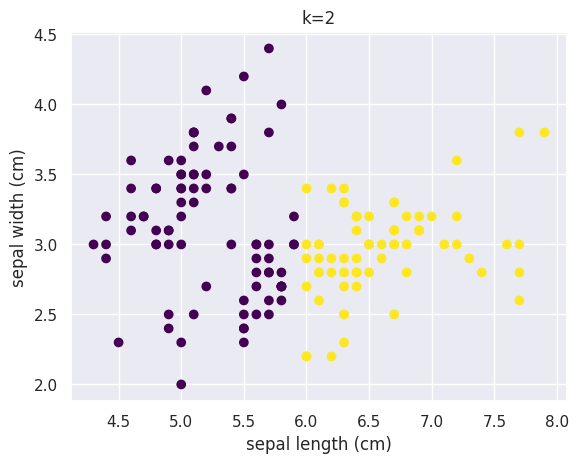

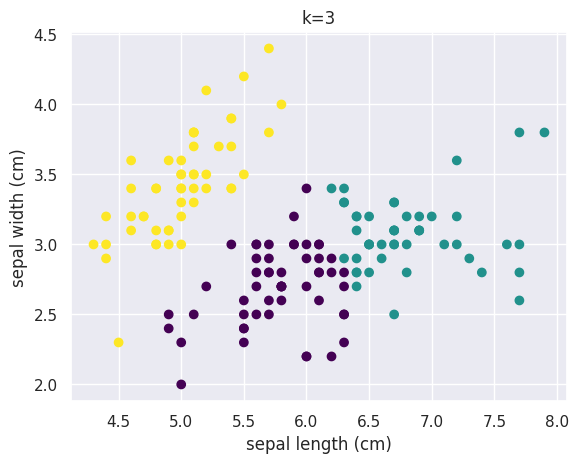

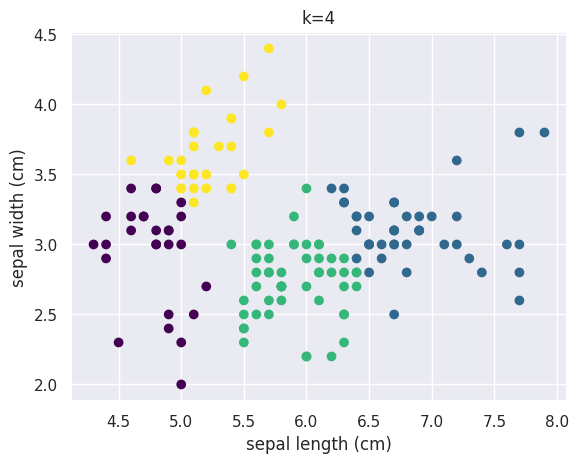

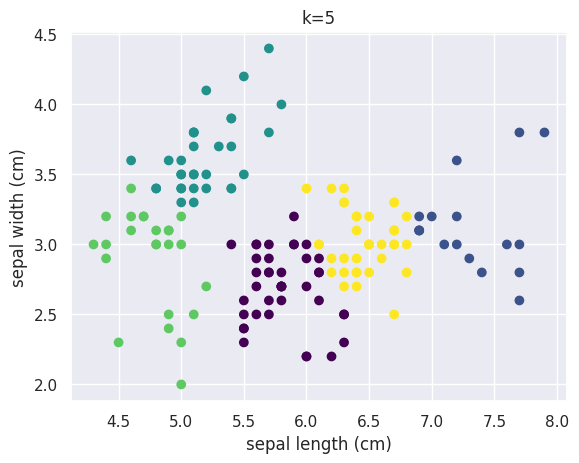

In [83]:
#кластеризация для набора данных ирисов Фишера.Выполним предсказания для модели, экспериментируя с количеством кластеров.
k_values = range(2,6)

for k in k_values:
    kmeans = KMeans(n_clusters=k ,n_init=k )
    #нормализация данных и оперделение принадлежности каждой точки к какому то кластеру
    y_kmeans = kmeans.fit_predict(data_iris)

    plt.scatter(data_iris[:, 0], data_iris[:, 1], c=y_kmeans, cmap='viridis')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(f'k={k}')
    plt.show()

<Figure size 5040x2160 with 0 Axes>

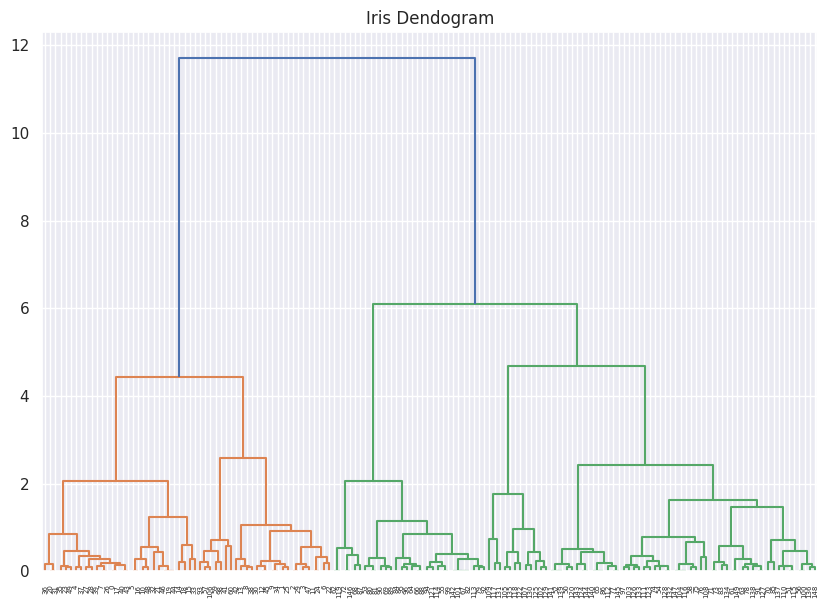

In [84]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Iris Dendogram")
dend = shc.dendrogram(shc.linkage(data_iris, method = 'ward'))

In [85]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster.fit_predict(data_iris)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 3, 1, 1, 3, 0, 3, 1, 3,
       1, 1, 1, 2, 2, 1, 1, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1])

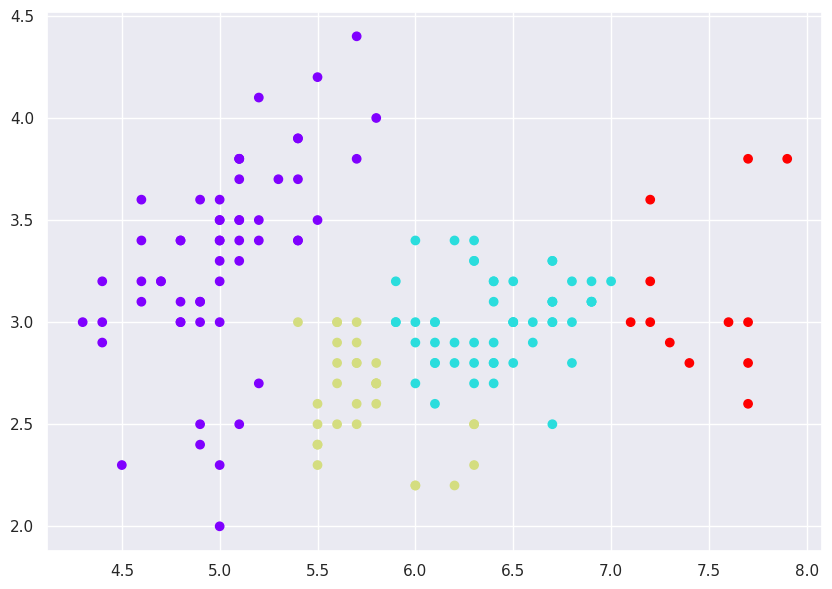

In [86]:
plt.figure(figsize=(10, 7))
plt.scatter(data_iris[:,0], data_iris[:,1], c=cluster.labels_, cmap='rainbow')

Итак, основная задача с изучением структуры данных и их подготовки к кластеризации. Метод иерархической кластеризации можно выполнять, указывая либо максимальное расстояние между кластерами (max_d), либо указывая количество кластеров (k)   

In [87]:
from sklearn import preprocessing
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [110]:
data = pd.read_excel('ClustATI0011.xlsx', sheet_name='Лист1')
data = data.drop(columns=['Имя'])
data.head()

,Чек,Статус,Заказы,Расстояние
0,128.000000,0,1,10
1,579.333333,0,3,4
2,376.666667,0,6,21
3,296.296000,0,1,10
4,111.250000,1,16,17


In [111]:
# посмотрим основные статистические параметры данных
data.describe()

,Чек,Статус,Заказы,Расстояние
count,2956.000000,2956.000000,2956.000000,2956.000000
mean,377.531648,0.320365,7.662382,15.158322
std,695.546854,0.466696,20.246477,20.980580
min,0.200000,0.000000,1.000000,0.000000
25%,120.000000,0.000000,1.000000,9.000000
50%,207.046667,0.000000,2.000000,10.000000
75%,380.000000,1.000000,5.000000,11.000000
max,14450.000000,1.000000,324.000000,238.000000


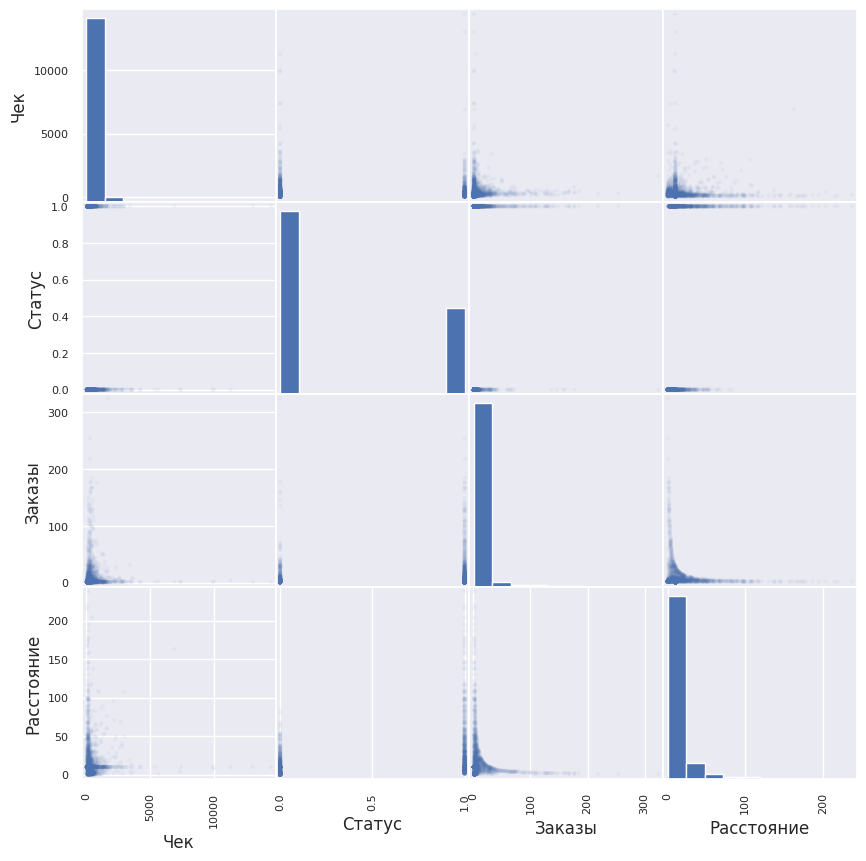

In [112]:
# построим диаграммы рассеивания и гистограммы для столбцов
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10));

In [115]:
# посмотрим наличие корреляций между значениями
data.corr()

,Чек,Статус,Заказы,Расстояние
Чек,1.000000,0.016888,0.014185,-0.002329
Статус,0.016888,1.000000,0.292487,0.365627
Заказы,0.014185,0.292487,1.000000,-0.116355
Расстояние,-0.002329,0.365627,-0.116355,1.000000


Text(0, 0.5, 'Заказы')

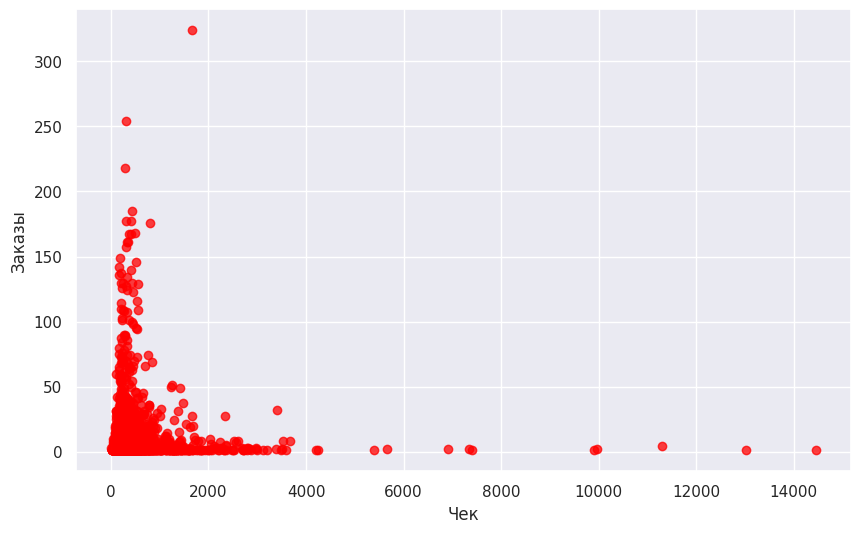

In [116]:
# Изменяя названия столбцов можно построить диаграммы рассеиванию двух параметров
# Замените названия стобцов col1 и col2
col1 = 'Чек'
col2 = 'Заказы'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1],
            data[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [117]:
# Выделим данные, начиная с первой колонки. Это то, что подлежит анализу. Данную операцию надо проделывать на рядах с названием строк
# удаляем столбец client, он не содержаит данныхдля кластеризации
data_for_clust=data.drop(data.columns[0], axis=1).values
#проверим результат, выведем первую строку
data_for_clust[0]

array([ 0,  1, 10])

In [118]:
# приводим данные к нормальным значениям
dataNorm = preprocessing.normalize(data_for_clust)
dataNorm

array([[0.        , 0.09950372, 0.99503719],
       [0.        , 0.6       , 0.8       ],
       [0.        , 0.27472113, 0.96152395],
       ...,
       [0.        , 0.17888544, 0.98386991],
       [0.        , 0.09950372, 0.99503719],
       [0.0099975 , 0.019995  , 0.99975009]])

In [119]:
# Вычисляем расстояния между каждым набором данных, т.е. строками массива data_for_clust (евклидово расстояние, по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объединение элементов в кластера и сохранение в спец.переменной (для визуализации и выделения количества кластеров)
data_linkage = linkage(data_dist, method='average')

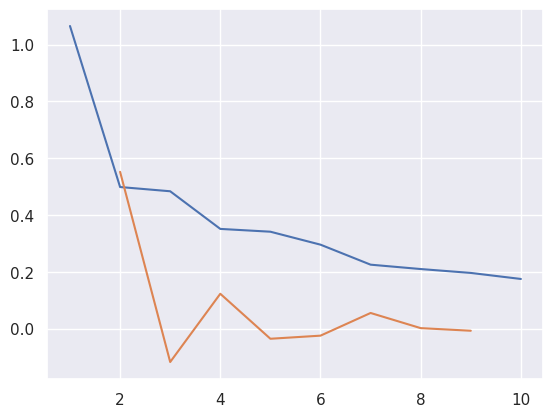

clusters: 2


In [120]:
# Метод локтя для оценки оптимального количества сегментов. Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("clusters:", k)

In [121]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма иерархической кластеризации (усеченная)')
        plt.xlabel('индекс выборки или (размер кластера)')
        plt.ylabel('расстояние')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

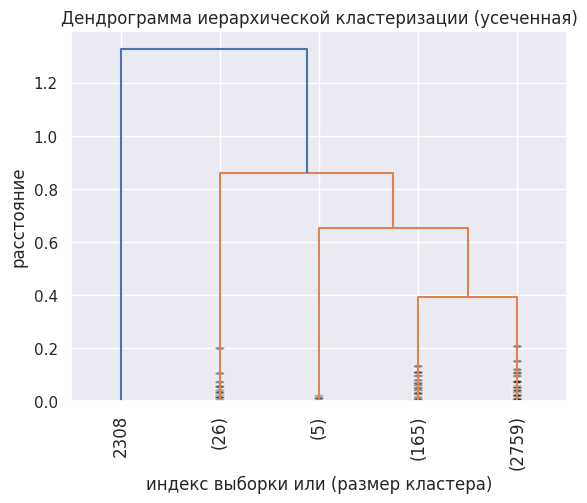

In [100]:
# указываем/меняем количество кластеров!
nCluster=5
#строим дендрограмму
fancy_dendrogram(data_linkage, truncate_mode='lastp', p=nCluster, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)
plt.show()

In [122]:
# Метод иерархической кластеризации
max_d = 0.2 #максимальное расстояние, можно изменять
# находим количество кластеров, между которыми растояние более max_d
clusters = fcluster(data_linkage, max_d, criterion='distance')
print(clusters)
print('Количество кластеров: ', clusters.max())

[6 9 6 ... 6 6 6]
Количество кластеров:  9


In [123]:
k=6
clusters=fcluster(data_linkage, k, criterion='maxclust')

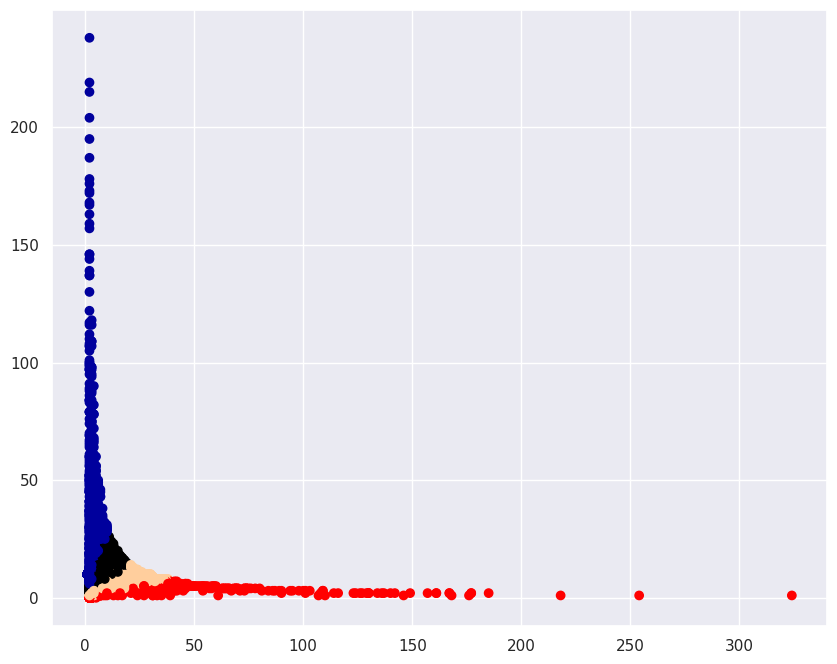

In [124]:
# рисуем график. Выбираем лучшее с точки зрения разбиения
plt.figure(figsize=(10, 8))
# изменяя номеря сечений, можем выводить распределения в любых осях
plt.scatter(data_for_clust[:,1], data_for_clust[:,2], c=clusters, cmap='flag')
plt.show()

In [132]:
dataI = data
dataI['cluster_no'] = clusters

with pd.ExcelWriter('result_fcluster.xlsx') as writer:
    dataI.to_excel(writer, sheet_name='IER')

In [126]:
res=dataI.groupby('cluster_no').mean()
res['Количество']=dataI.groupby('cluster_no').size().values
res

,Чек,Статус,Заказы,Расстояние,Количество
cluster_no,,,,,
1,382.132653,0.434629,44.035336,2.332155,283
2,424.181428,0.386792,12.742138,5.166667,318
3,274.222222,1.000000,2.333333,1.000000,3
4,268.000000,1.000000,2.000000,2.000000,1
5,356.926097,0.263550,1.755346,19.299851,2011
6,453.180198,0.491176,7.638235,10.847059,340


In [127]:
# Кластеризация методом k-means
km = KMeans(n_clusters=6).fit(dataNorm)
km.labels_ +1

array([2, 1, 6, ..., 2, 2, 2], dtype=int32)

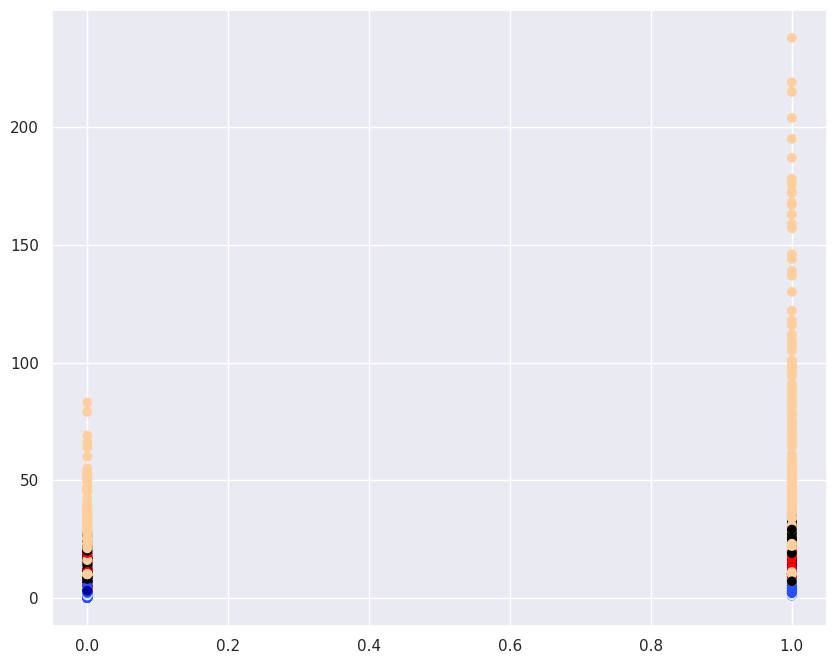

In [128]:
plt.figure(figsize=(10, 8))
plt.scatter(data_for_clust[:,0], data_for_clust[:,2], c=km.labels_, cmap='flag')
plt.show()

In [130]:
dataK = data
dataK['group_no'] = km.labels_

with pd.ExcelWriter('result_kmeans.xlsx') as writer:
    dataK.to_excel(writer, sheet_name='KMeans')

In [131]:
res=dataK.groupby('group_no').mean()
res['Количество']=dataK.groupby('group_no').size().values
res

,Чек,Статус,Заказы,Расстояние,cluster_no,Количество
group_no,,,,,,
0,433.554391,0.497143,7.325714,11.857143,6.000000,175
1,352.542250,0.246703,1.462637,19.574176,5.000000,1820
2,452.955305,0.357414,12.091255,4.543726,2.011407,263
3,379.830241,0.453925,43.621160,2.491468,1.034130,293
4,381.487352,0.463415,9.914634,8.426829,4.817073,164
5,437.772633,0.448133,4.643154,15.771784,5.207469,241


In [133]:
with pd.ExcelWriter('GroupResults.xlsx') as w:
    res.to_excel(w, sheet_name='GroupResults')